In [4]:
from google.colab import files
uploaded = files.upload()


Saving SampleSuperstore.csv to SampleSuperstore.csv


In [6]:
import pandas as pd

df = pd.read_csv('SampleSuperstore.csv', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
!pip install pandas matplotlib seaborn


In [9]:
import pandas as pd

# Update filename if needed
df = pd.read_csv('SampleSuperstore.csv', encoding='ISO-8859-1')

# Check top 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


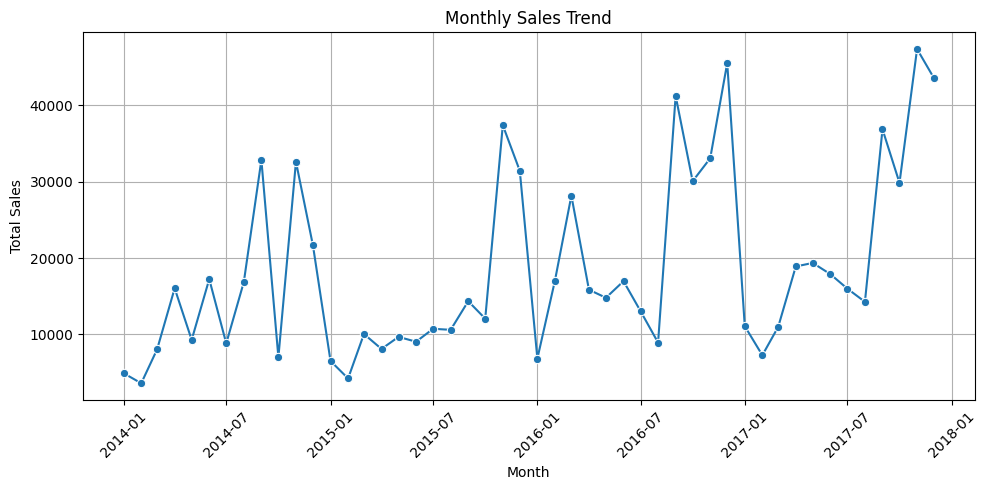

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract year and month
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by Month and sum Sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Convert Month back to datetime for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-2846060406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


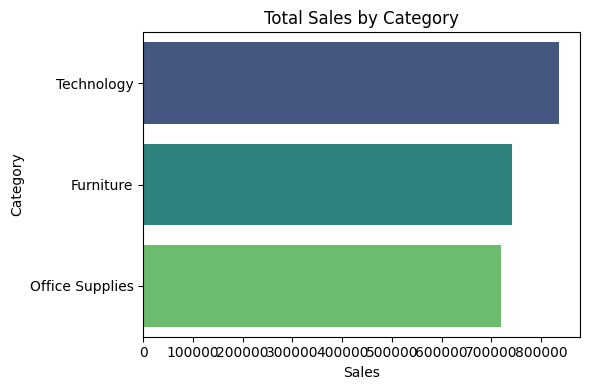

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-3137025684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='Set2')


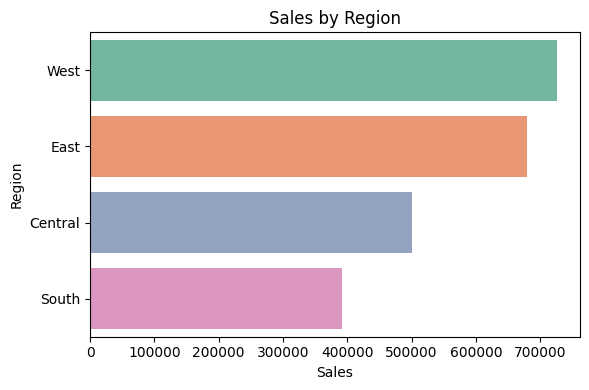

In [14]:
# Group by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='Set2')
plt.title("Sales by Region")
plt.xlabel("Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


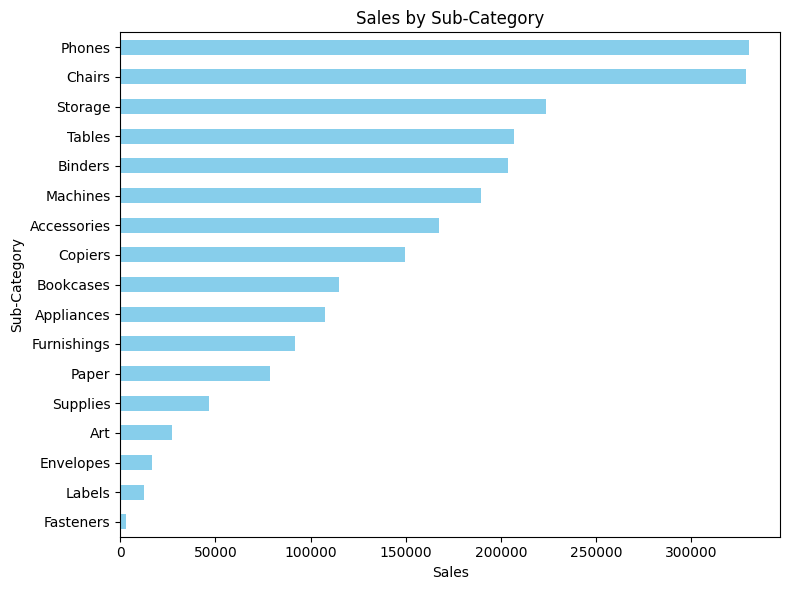

In [15]:
# Group by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values()

# Plot
plt.figure(figsize=(8, 6))
subcat_sales.plot(kind='barh', color='skyblue')
plt.title("Sales by Sub-Category")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()
